In [96]:
!pip install scikit-learn==1.2.1
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!cp '/content/drive/MyDrive/17-313 Group - The Specs/Project 4/student_data.csv' 'student_data.csv' 
!cp '/content/drive/MyDrive/17-313 Group - The Specs/Project 4/career-model/model.pkl' 'model.pkl'
!cp '/content/drive/MyDrive/17-313 Group - The Specs/Project 4/career-model/predict.py' 'predict.py'

In [98]:
test_data = pd.read_csv('student_data.csv')
test_data


,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0
...,...,...,...,...,...,...,...,...,...
495,495,M,20,Computer Science,2.89,Student Government,5,0,0
496,496,F,24,Computer Science,2.53,Buggy,3,2,1
497,497,F,21,Computer Science,2.00,Sorority,3,2,0
498,498,M,22,Electrical and Computer Engineering,3.24,Men's Basketball,4,1,1


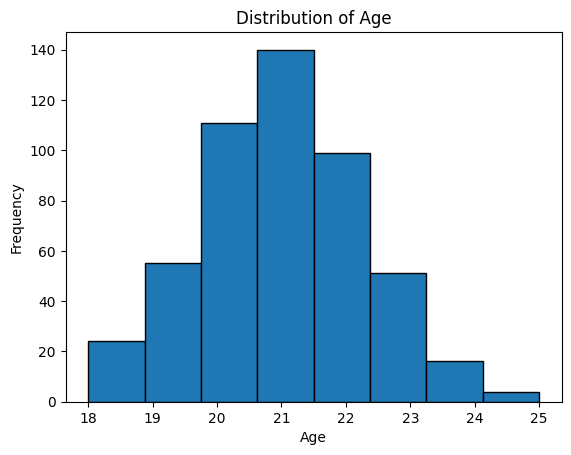

In [99]:
# Plot the distribution of Age
test_data['Age'].plot(kind='hist', bins=8, edgecolor='black')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

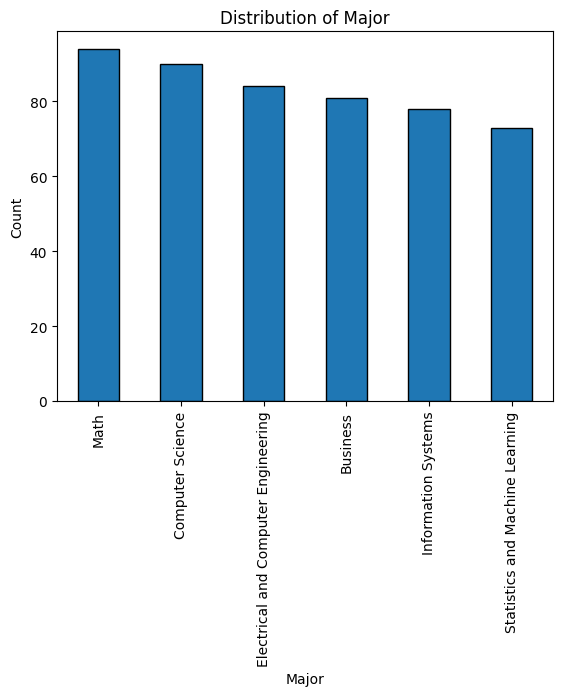

In [100]:
# Plot the distribution of Major
test_data['Major'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Distribution of Major')
plt.show()

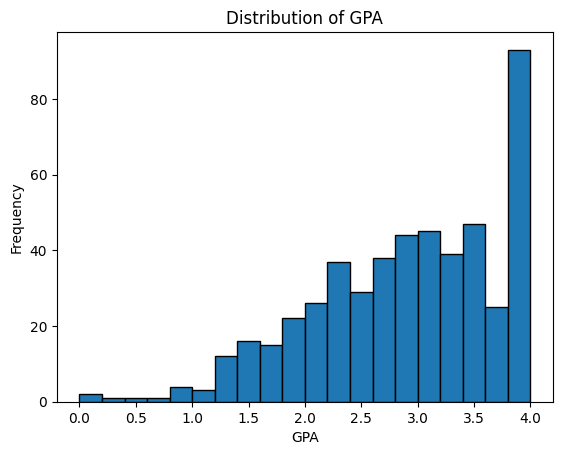

In [101]:
# Plot the distribution of GPA
test_data['GPA'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('GPA')
plt.title('Distribution of GPA')
plt.show()

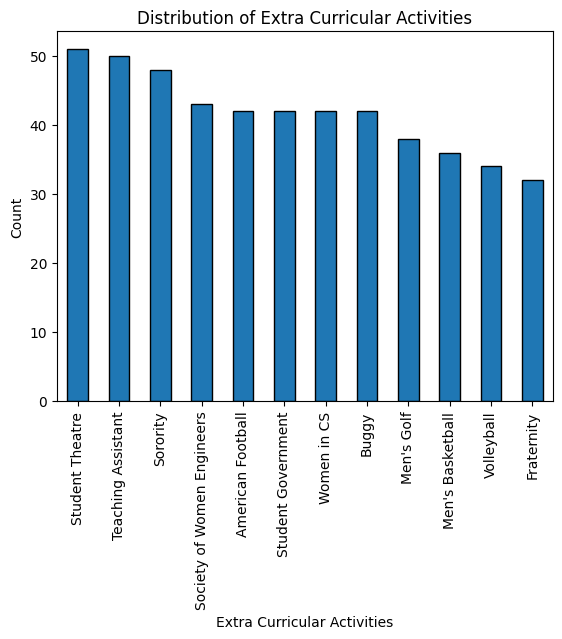

In [102]:
# Plot the distribution of Extra Curricular Activities
test_data['Extra Curricular'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Extra Curricular Activities')
plt.ylabel('Count')
plt.title('Distribution of Extra Curricular Activities')
plt.show()

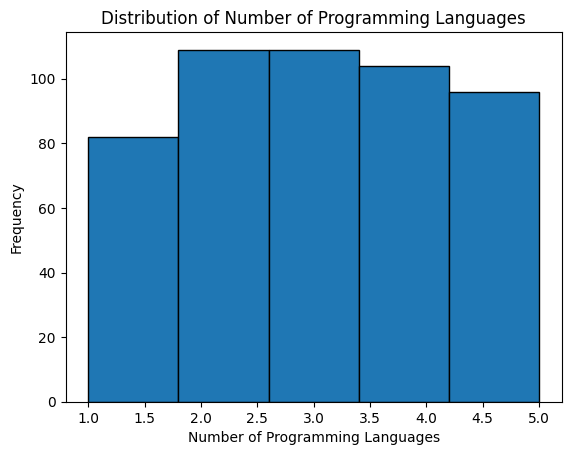

In [103]:
# Plot the distribution of Number of Programming Languages
test_data['Num Programming Languages'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Number of Programming Languages')
plt.title('Distribution of Number of Programming Languages')
plt.show()

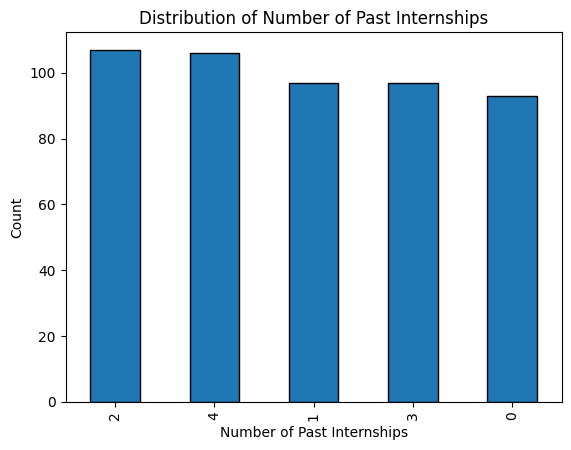

In [104]:
# Plot the distribution of Number of Past Internships
test_data['Num Past Internships'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Number of Past Internships')
plt.ylabel('Count')
plt.title('Distribution of Number of Past Internships')
plt.show()

In [105]:
test_data = test_data.drop(['Student ID'], axis=1)
test_dataX = test_data.drop(['Good Candidate'], axis=1)
good_candidates = test_data['Good Candidate']

In [106]:
import predict

In [107]:
model = pickle.load(open('model.pkl','rb'))
y_pred = model.predict(test_dataX)

from sklearn.metrics import accuracy_score

# now we can compute the accuracy of those predictions
print('Accuracy Score for model', accuracy_score(good_candidates,y_pred))

Accuracy Score for model 0.832


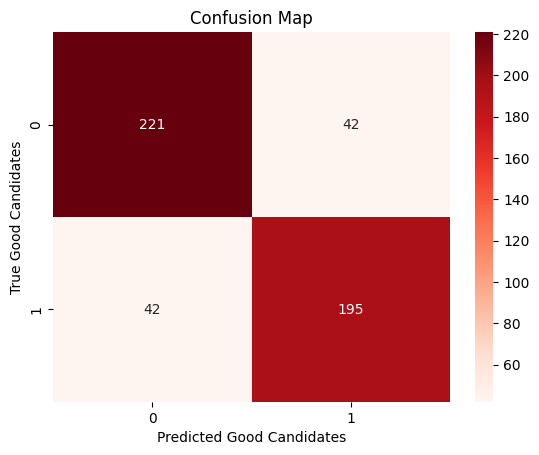

In [108]:
from sklearn.metrics import confusion_matrix

confusion_matrix(good_candidates, y_pred)

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(good_candidates, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted Good Candidates')
plt.ylabel('True Good Candidates')
plt.title('Confusion Map')
plt.show()